In [1]:
from datetime import datetime, timedelta
import numpy as np
import random
import networkx as nx
from itertools import combinations, permutations

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from collections import defaultdict

import copy

from simulation_core.infrastructure import *
from simulation_core.signaling import *
from simulation_core.network import *
from simulation_core.train.Train import Train
from simulation_core.train.TrainList import TrainList
from simulation_core.network.System.System import System

from simulation_test.sim import *
from simulation_core.network.network_utils import all_simple_paths, shortest_path

from simulation_test.simulation_configs import *




sys = System(sim_init_time, spd_container, acc_container, dcc_container,
             term_time=sim_term_time,
             dos_period=dos_period,  
             dos_pos=dos_pos,
             headway=headway, 
             refresh_time=refresh_time)

In [2]:
_exception = None
def launch(sys, downtrain=True, same_train_set=True):
    global _exception
    try:
        spd_list, acc_list, dcc_list = max_spd_list.copy(), max_acc_list.copy(), max_dcc_list.copy()
        while sys.sys_time - sys.init_time <= sys.term_time - sys.init_time:
            _semaphore_to_return = False
            for t in sys.trains:
                sys.dispatcher.request_routing(t)
                t.move()
            if sys.sys_time+sys.refresh_time - sys.last_train_init_time >= sys.headway:
                if downtrain:
                    if not sys.signal_points[0].curr_train_with_route.keys():
                        if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[0],0)) for t in sys.trains]):
                            if not sys.signal_points[0].track_by_port[1].trains:
                                if same_train_set:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[0],0,
                                        sys.signal_points[10],1,
                                        max_spd=spd_list.pop(0),
                                        max_acc=acc_list.pop(0),
                                        max_dcc=dcc_list.pop(0))
                                else:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[0],0,
                                        sys.signal_points[10],1,
                                        length=1)
                else:
                    if not sys.signal_points[10].curr_train_with_route.keys():
                        if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[10],1)) for t in sys.trains]):
                            if not sys.signal_points[10].track_by_port[0].trains:
                                if same_train_set:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[10],1,
                                        sys.signal_points[0],0,
                                        max_spd=spd_list.pop(0),
                                        max_acc=acc_list.pop(0),
                                        max_dcc=dcc_list.pop(0))
                                else:
                                    t = sys.dispatcher.generate_train(
                                        sys.signal_points[10],1,
                                        sys.signal_points[0],0,
                                        length=1)
            sys.sys_time+=sys.refresh_time
    except Exception as e:
        _exception = e
        print('{0} [ERROR]: Exception: {1}'.format(timestamper(sys.sys_time), e))
    return sys

[2018-01-10 10:04:10] [INFO]: new train generated WITHOUT init track.
[2018-01-10 10:05:00] [INFO]: Train idx: 0 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at 0.0
[2018-01-10 10:05:00] [INFO]: route (0, 1) of CtrlPnt 0 is opened
[2018-01-10 10:05:00] [INFO]: Train idx: 0 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00 initiated, 
	entering into Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0
[2018-01-10 10:05:00] [INFO]: route (0, 1) of CtrlPnt 0 is closed
[2018-01-10 10:05:50] [INFO]: Train idx: 0 occupying:[((CtrlPnt 0, 1), (AutoPnt 1, 0)), ((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at 10.0
[2018-01-10 10:05:50] [INFO]: route (0, 1) of CtrlPnt 2 is opened
[2018-01-10 10:20:50] [INFO]: new train generated WITHOUT init track.
[2018-01-10 10:21:40] [INFO]: Train idx: 1 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, 
	requested (0, 1) at

No handles with labels found to put in legend.


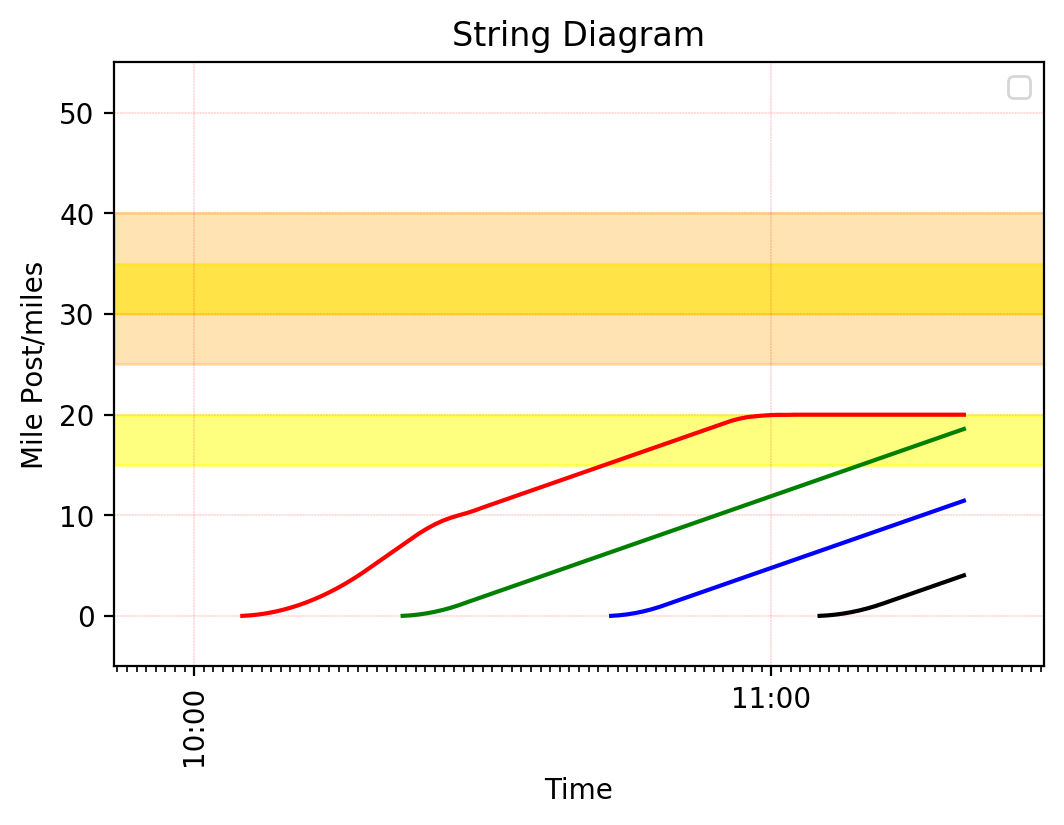

In [3]:
# Init Launch
sys = launch(sys=sys, downtrain=True, same_train_set=True)
string_diagram(sys)
if _exception:
    raise _exception

No handles with labels found to put in legend.


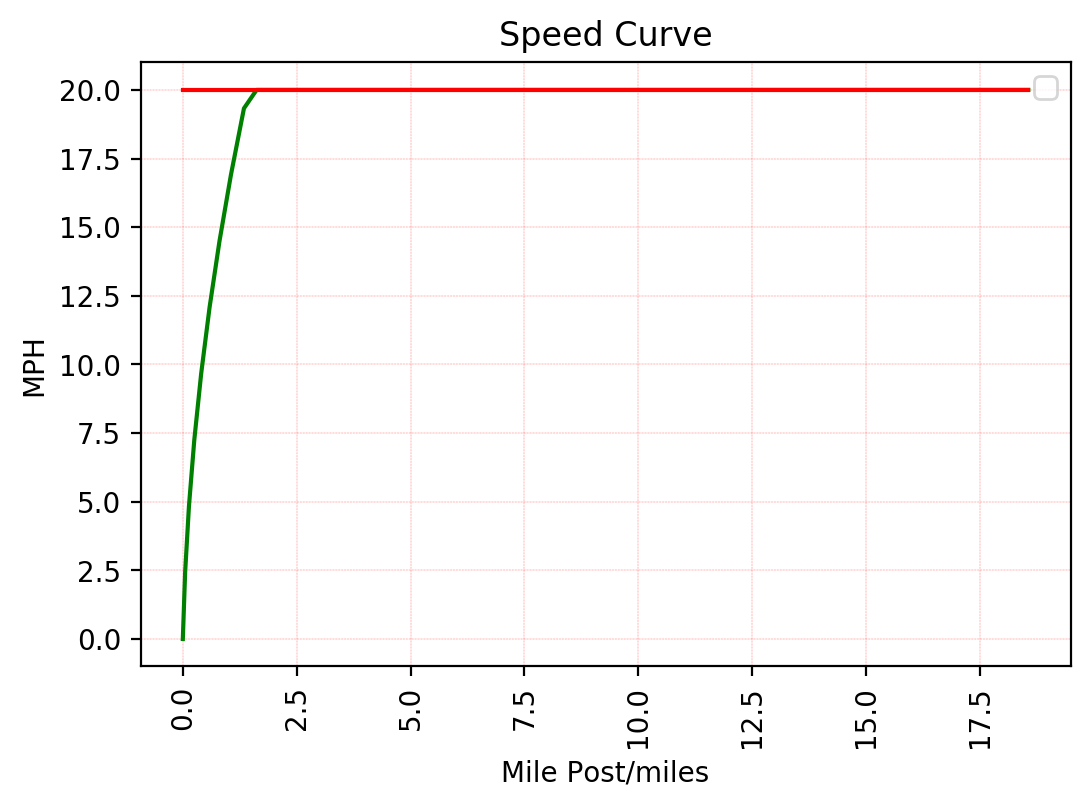

<Figure size 1440x1280 with 0 Axes>

In [4]:
speed_curve(sys,sys.trains[1])

No handles with labels found to put in legend.


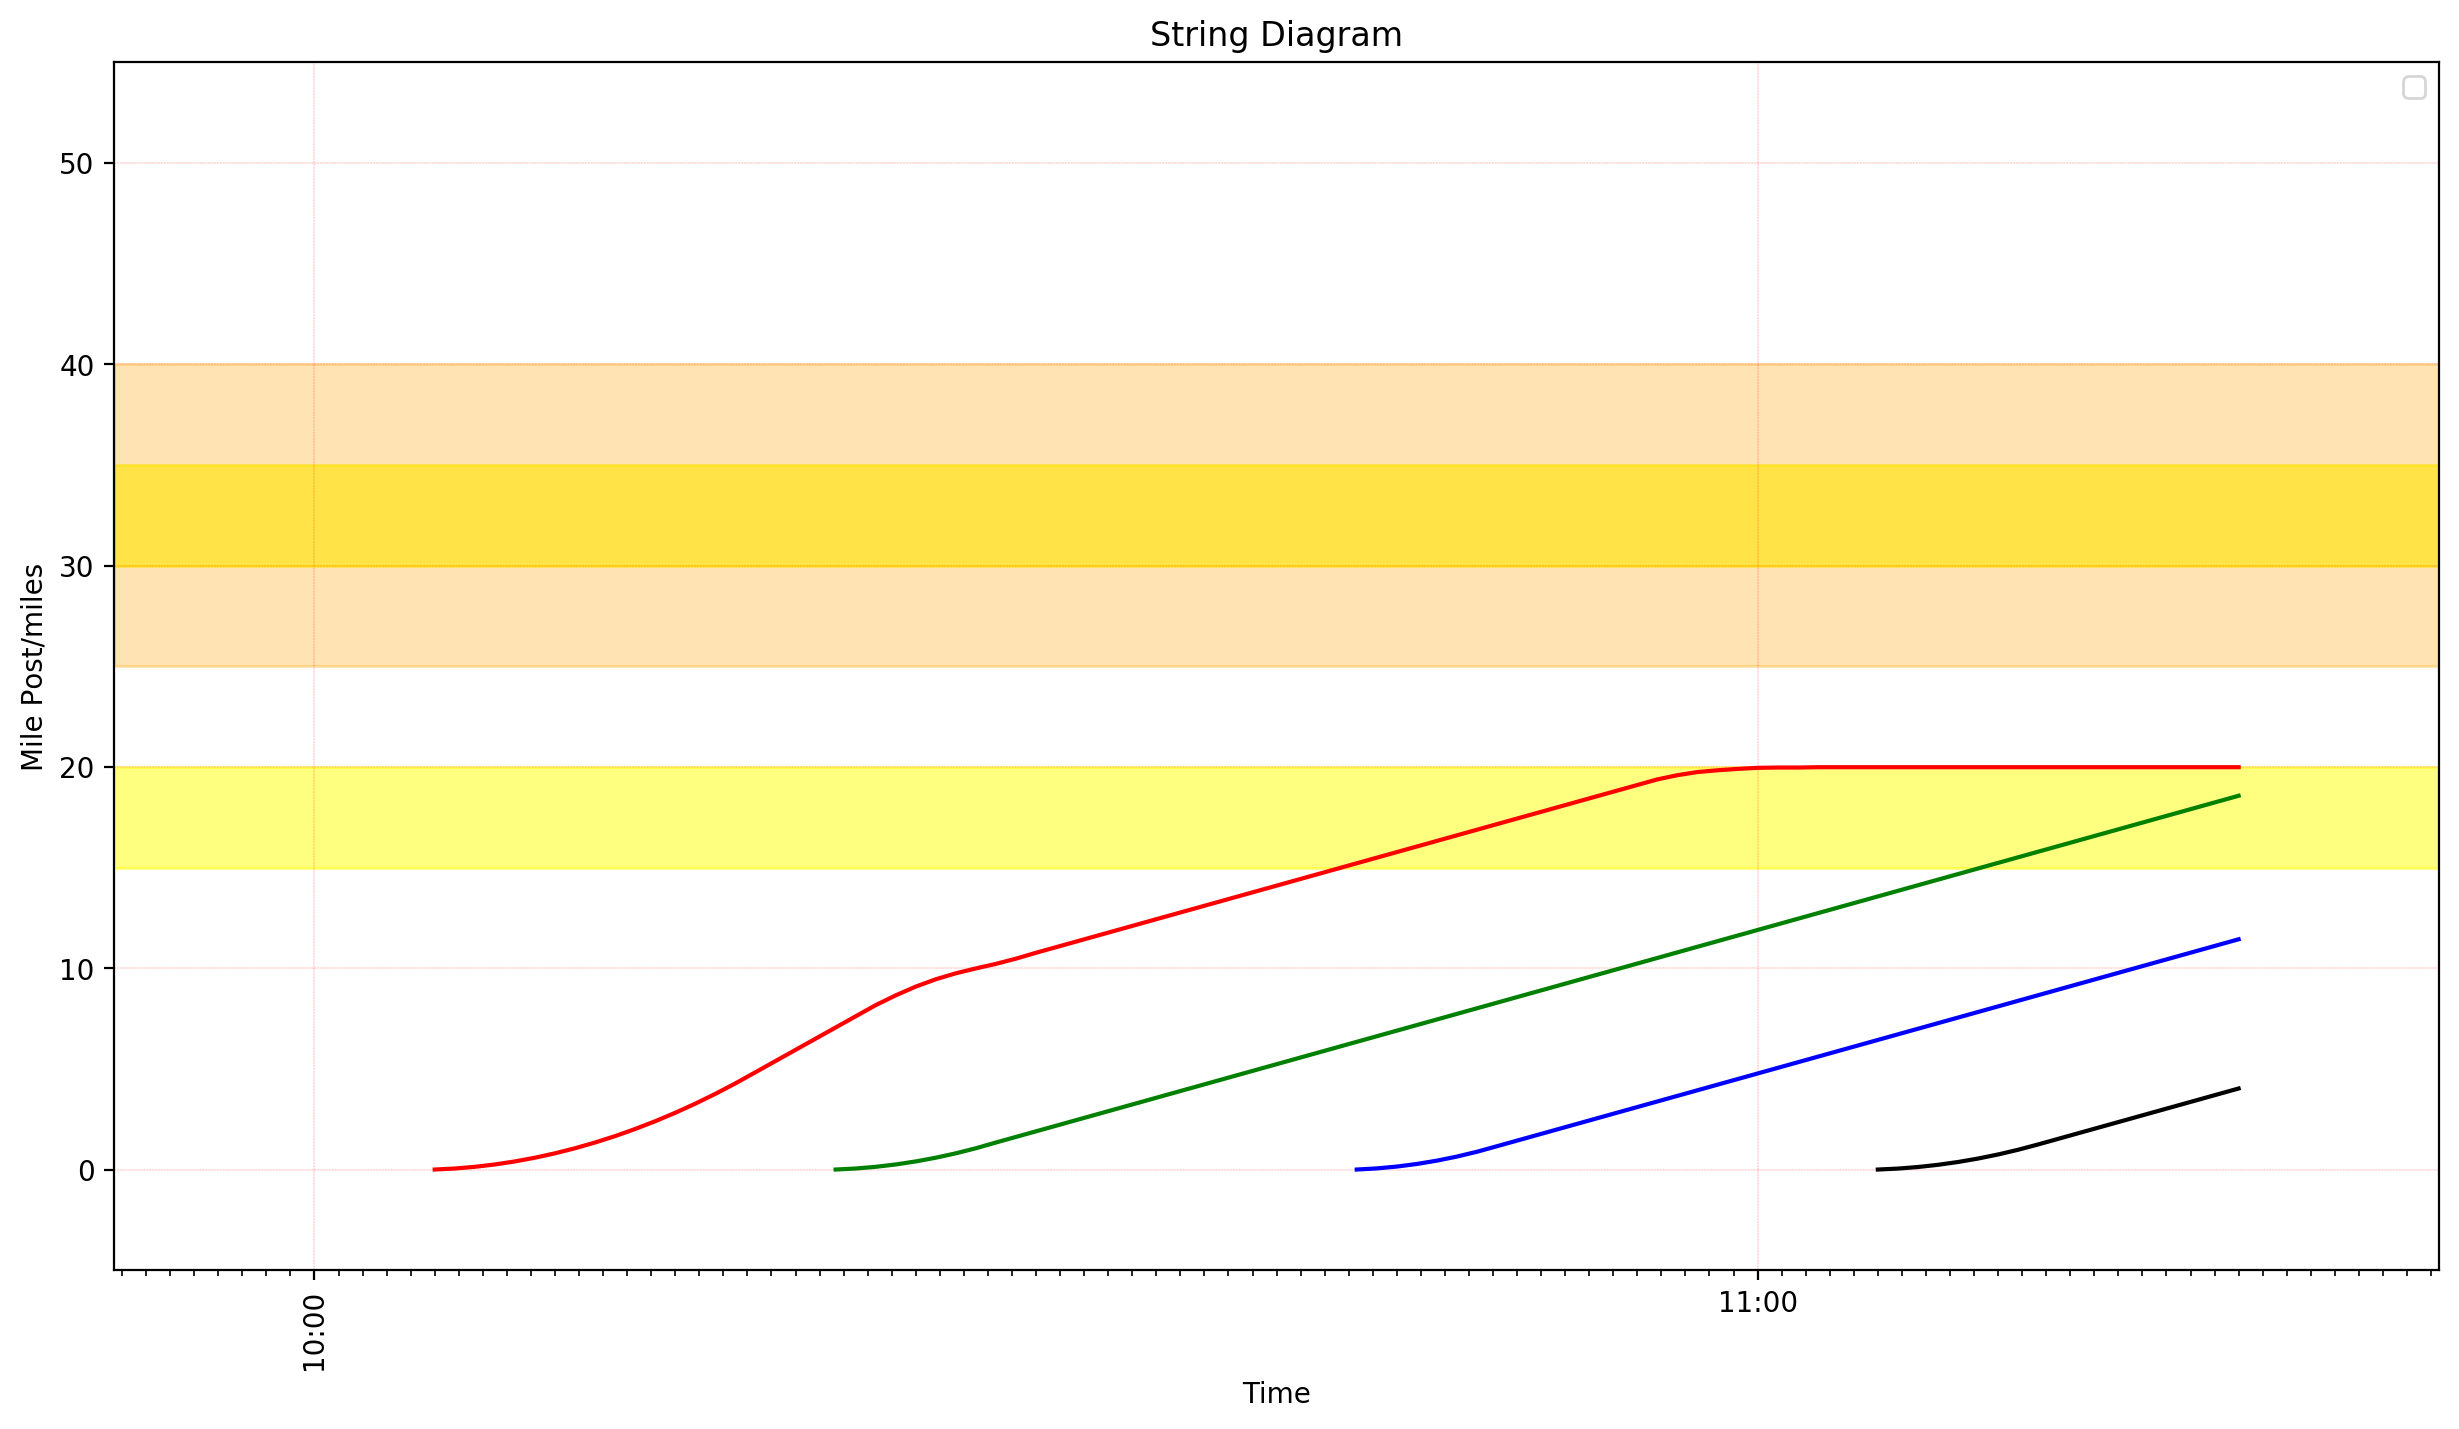

In [5]:
# 2nd Launch
sys = launch(sys=sys, downtrain=True, same_train_set=True)
string_diagram(sys)

In [6]:
max_spd_list = [trn.max_spd for trn in sys.trains]
max_spd_list

[0.01933490674860608,
 0.019453894986990607,
 0.019707829327066988,
 0.017072263857428882]

In [7]:
max_acc_list = [trn.max_acc for trn in sys.trains]
max_acc_list

[1.3421675939502108e-05,
 1.3421675939502108e-05,
 1.4714042032097714e-05,
 1.2468684884532034e-05]

In [8]:
max_dcc_list = [trn.max_dcc for trn in sys.trains]
max_dcc_list

[2.765432098765432e-05,
 2.765432098765432e-05,
 2.765432098765432e-05,
 2.765432098765432e-05]

In [9]:
trn0, trn1, trn2 = sys.trains[0], sys.trains[1], sys.trains[2]
sys.dispatcher.determine_if_hold_to_be_passed(trn0)

True

In [10]:
all([trk.trains for trk in trn0.curr_track.yard.tracks])

True

In [11]:
trn0.max_spd

0.01933490674860608

In [12]:
sys.dispatcher.determine_if_hold_to_be_passed(trn0)

True

In [13]:
trn1 = sys.trains[1]
trn1

Train idx: 1 occupying:[((CtrlPnt 3, 3), (CtrlPnt 4, 2))] head MP:18.56 rear MP:17.56

In [14]:
sys.dispatcher.request_routing(trn1)

In [15]:
trn2.curr_sigpoint
trn2

Train idx: 2 occupying:[((CtrlPnt 2, 1), (CtrlPnt 3, 0))] head MP:11.44 rear MP:10.44

In [16]:
trn2.curr_spd_lmt_abs * 3600

20.0

In [17]:
trn2.curr_target_spd_abs * 3600

0.0

In [18]:
trn2.curr_sig.__dict__

{'_observers': [],
 'system': <simulation_core.network.System.System.System at 0x1c2d00d57b8>,
 'signal_point': CtrlPnt 3,
 '_MP': 15.0,
 'port_idx': 0,
 '_aspect': Aspect: r, 	 route None, target speed 0.0 mph,
 '_next_enroute_sigpoint': None,
 'sigpoint': CtrlPnt 3,
 'type': 'home',
 '_bblks_to_enter': None,
 '_ctrl_pnts_to_reach': None,
 '_governed_bigblock': None}

In [19]:
trn0 = sys.trains[0]


In [20]:
trn0.curr_sig.__dict__

{'_observers': [],
 'system': <simulation_core.network.System.System.System at 0x1c2d00d57b8>,
 'signal_point': CtrlPnt 4,
 '_MP': 20.0,
 'port_idx': 0,
 '_aspect': Aspect: r, 	 route None, target speed 0.0 mph,
 '_next_enroute_sigpoint': None,
 'sigpoint': CtrlPnt 4,
 'type': 'home',
 '_bblks_to_enter': None,
 '_ctrl_pnts_to_reach': None,
 '_governed_bigblock': None}

In [21]:
trn1.curr_spd_lmt_abs * 3600

20.0

In [22]:
_tgt_MP = trn1.curr_sig.MP if trn1.curr_sig else _direction_sign * float('inf')

In [23]:
trn1.curr_MP

18.56438981617246

In [24]:
trn1.acc_before_dcc(0, 5, 0, trn1.curr_target_spd_abs)

True

In [25]:
trn1.sign_MP(trn1.curr_routing_path_segment)

1

In [26]:
trn1.curr_target_spd_abs

0.005555555555555556

In [27]:
trn1.curr_spd_lmt_abs

0.005555555555555556

In [28]:
trn0.curr_sigpoint.curr_routes

[(2, 1)]

In [29]:
trn0

Train idx: 0 occupying:[((CtrlPnt 3, 1), (CtrlPnt 4, 0))] head MP:19.98 rear MP:18.98

In [30]:
trn1

Train idx: 1 occupying:[((CtrlPnt 3, 3), (CtrlPnt 4, 2))] head MP:18.56 rear MP:17.56